#Asignatura: Visión por Computador

##Alumnos: Yeray Álvarez-Buylla Parra, María Elena Navarro Santana

##Práctica 3

###Paquetes necesarios

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

TAREA: Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


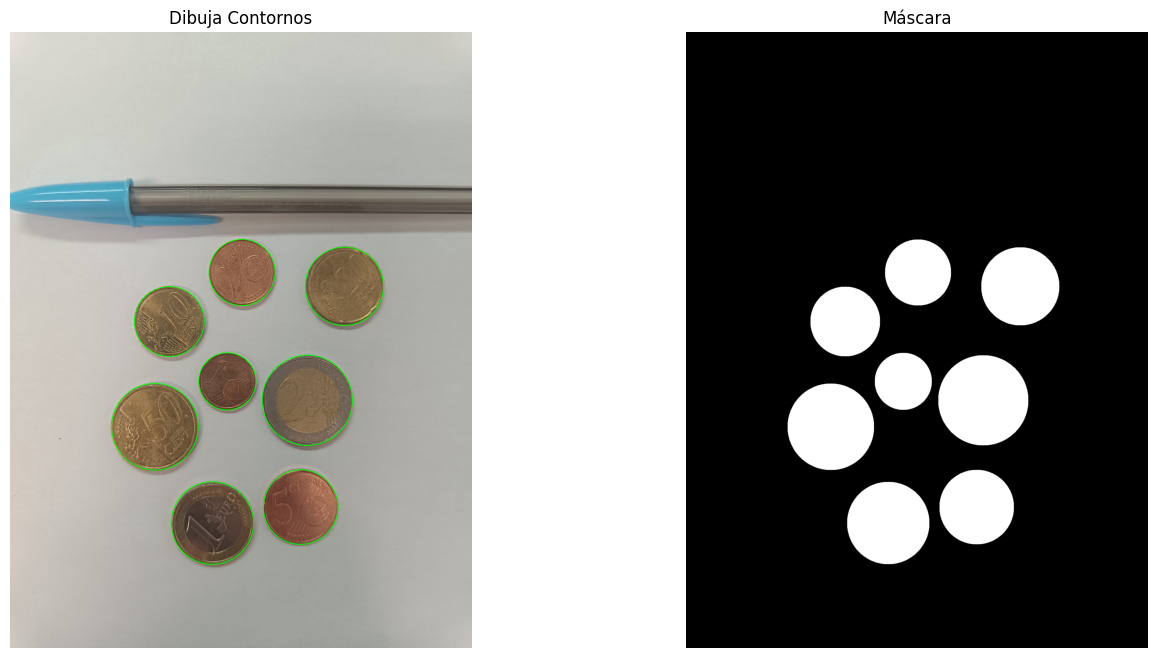

Número total de monedas:  8
Valor total de las monedas: €3.88
Valores de cada moneda y cantidad:
Monedas de 2 eur: 1 unidades
Monedas de 1 eur: 1 unidades
Monedas de 50 cent: 1 unidades
Monedas de 20 cent: 1 unidades
Monedas de 10 cent: 1 unidades
Monedas de 5 cent: 1 unidades
Monedas de 2 cent: 1 unidades
Monedas de 1 cent: 1 unidades


In [4]:
# Cargar la imagen
img = cv2.imread('monedas.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Conversión a escala de grises y suavizado
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pimg = cv2.medianBlur(gris, 7)

# Detección de círculos
circ = cv2.HoughCircles(
    pimg,
    cv2.HOUGH_GRADIENT,
    1,
    100,
    param1=100,
    param2=20,
    minRadius=68,
    maxRadius=200,
)

valores_monedas = {"2_eur": 2, "1_eur": 1, "50_cent": 0.5, "20_cent": 0.2, "10_cent": 0.1, "5_cent": 0.05, "2_cent": 0.02, "1_cent": 0.01}

moneda_seleccionada = None
def clic_en_imagen(event, x, y, flags, param):
    global moneda_seleccionada
    if event == cv2.EVENT_LBUTTONDOWN:
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            # Verifica si el clic está dentro del círculo
            if np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2) < det_radio:
                moneda_seleccionada = det
        # Salimos cuando se selecciona la moneda
        if moneda_seleccionada is not None:
            cv2.destroyAllWindows()

img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
    x_coor, y_coor, det_radio = det
    cv2.circle(img_rgb, (int(x_coor), int(y_coor)), int(det_radio), (0, 255, 0), 2)
    cv2.circle(img_cont, (int(x_coor), int(y_coor)), int(det_radio), (255, 255, 255), -1)

# Crea una ventana para la imagen
cv2.namedWindow('Imagen', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen', 450, 800)

moneda_seleccionada = cv2.setMouseCallback('Imagen', clic_en_imagen)

# Muestra la imagen con círculos
cv2.imshow('Imagen', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

error = 2.53
cantidad_total = 0.0
conteo_monedas = {
    "2_eur": 0, "1_eur": 0, "50_cent": 0, "20_cent": 0, "10_cent": 0,
    "5_cent": 0, "2_cent": 0, "1_cent": 0
}

for det in circ[0]:
    det_radio_moneda_seleccionada = moneda_seleccionada[2]
    det_radio = det[2]
    if abs(det_radio - ((16.26 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["1_cent"]
        conteo_monedas["1_cent"] += 1
    elif abs(det_radio - ((18.75 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["2_cent"]
        conteo_monedas["2_cent"] += 1
    elif abs(det_radio - ((21.25 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["5_cent"]
        conteo_monedas["5_cent"] += 1
    elif abs(det_radio - ((19.75 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["10_cent"]
        conteo_monedas["10_cent"] += 1
    elif abs(det_radio - ((22.25 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["20_cent"]
        conteo_monedas["20_cent"] += 1
    elif abs(det_radio - ((24.25 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["50_cent"]
        conteo_monedas["50_cent"] += 1
    elif abs(det_radio - det_radio_moneda_seleccionada) <= error:
        cantidad_total += valores_monedas["1_eur"]
        conteo_monedas["1_eur"] += 1
    elif abs(det_radio - ((25.75 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["2_eur"]
        conteo_monedas["2_eur"] += 1

# Muestra los resultados
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Dibuja Contornos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont)
plt.title('Máscara')

plt.show()

print("Número total de monedas: ", len(circ[0]))

print(f"Valor total de las monedas: €{cantidad_total:.2f}")
print("Valores de cada moneda y cantidad:")
for moneda, cantidad in conteo_monedas.items():
    if cantidad > 0:
        print(f"Monedas de {moneda.replace('_', ' ')}: {cantidad} unidades")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


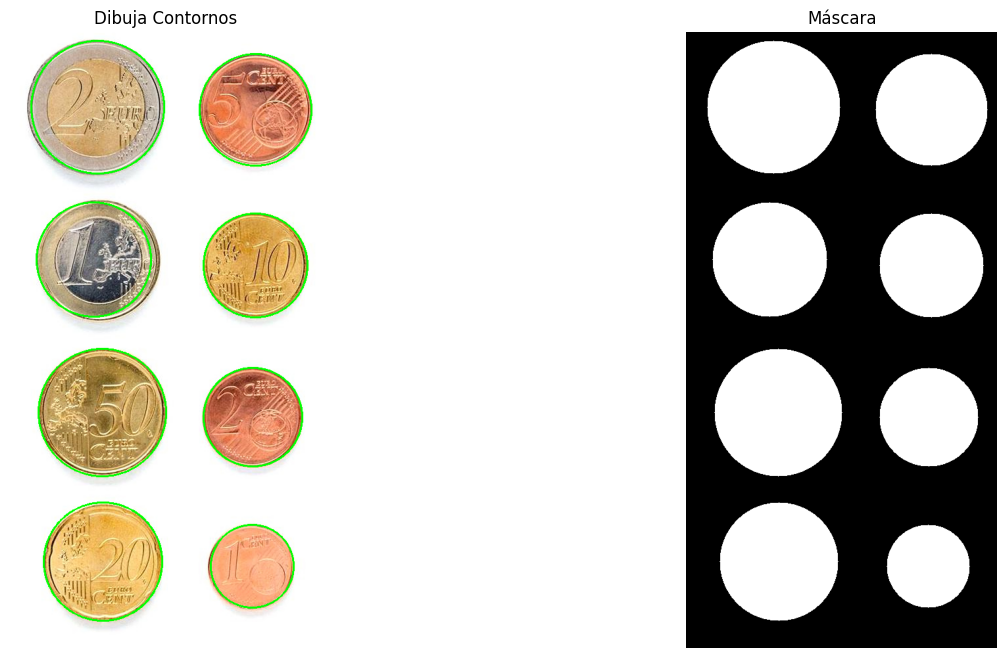

Número total de monedas:  8
Valor total de las monedas: €3.86
Valores de cada moneda y cantidad:
Monedas de 2 eur: 1 unidades
Monedas de 1 eur: 1 unidades
Monedas de 50 cent: 1 unidades
Monedas de 20 cent: 1 unidades
Monedas de 10 cent: 1 unidades
Monedas de 5 cent: 1 unidades
Monedas de 1 cent: 1 unidades


In [5]:
# Cargar la imagen
img = cv2.imread('monedas1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Conversión a escala de grises y suavizado
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pimg = cv2.medianBlur(gris, 7)

#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=150, # valor del gradiente
        param2=25, # umbral acumulador
        minRadius=40,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

valores_monedas = {"2_eur": 2, "1_eur": 1, "50_cent": 0.5, "20_cent": 0.2, "10_cent": 0.1, "5_cent": 0.05, "2_cent": 0.02, "1_cent": 0.01}

moneda_seleccionada = None
def clic_en_imagen(event, x, y, flags, param):
    global moneda_seleccionada
    if event == cv2.EVENT_LBUTTONDOWN:
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            # Verifica si el clic está dentro del círculo
            if np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2) < det_radio:
                moneda_seleccionada = det
        # Salimos cuando se selecciona la moneda
        if moneda_seleccionada is not None:
            cv2.destroyAllWindows()

img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
    x_coor, y_coor, det_radio = det
    cv2.circle(img_rgb, (int(x_coor), int(y_coor)), int(det_radio), (0, 255, 0), 2)
    cv2.circle(img_cont, (int(x_coor), int(y_coor)), int(det_radio), (255, 255, 255), -1)

# Crea una ventana para la imagen
cv2.namedWindow('Imagen', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen', 450, 800)

moneda_seleccionada = cv2.setMouseCallback('Imagen', clic_en_imagen)

# Muestra la imagen con círculos
cv2.imshow('Imagen', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

error = 2.5
cantidad_total = 0.0
conteo_monedas = {
    "2_eur": 0, "1_eur": 0, "50_cent": 0, "20_cent": 0, "10_cent": 0,
    "5_cent": 0, "2_cent": 0, "1_cent": 0
}

##NO ACTUA PROPORCIONAL PORQUE NO ES POR PORCENTAJES
## TAMBIEN TIENE QUE VER LA PERSPECTIVA DE LA FOTOGRAFIA
for det in circ[0]:
    det_radio_moneda_seleccionada = moneda_seleccionada[2]
    det_radio = det[2]
    if abs(det_radio - ((16.26 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["1_cent"]
        conteo_monedas["1_cent"] += 1
    elif abs(det_radio - ((18.75 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["2_cent"]
        conteo_monedas["2_cent"] += 1
    elif abs(det_radio - ((21.25 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["5_cent"]
        conteo_monedas["5_cent"] += 1
    elif abs(det_radio - ((19.75 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["10_cent"]
        conteo_monedas["10_cent"] += 1
    elif abs(det_radio - ((22.25 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["20_cent"]
        conteo_monedas["20_cent"] += 1
    elif abs(det_radio - ((24.25 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["50_cent"]
        conteo_monedas["50_cent"] += 1
    elif abs(det_radio - det_radio_moneda_seleccionada) <= error:
        cantidad_total += valores_monedas["1_eur"]
        conteo_monedas["1_eur"] += 1
    elif abs(det_radio - ((25.75 / 2) * det_radio_moneda_seleccionada / (23.25 / 2))) <= error:
        cantidad_total += valores_monedas["2_eur"]
        conteo_monedas["2_eur"] += 1

# Muestra los resultados
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Dibuja Contornos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont)
plt.title('Máscara')

plt.show()

print("Número total de monedas: ", len(circ[0]))

print(f"Valor total de las monedas: €{cantidad_total:.2f}")
print("Valores de cada moneda y cantidad:")
for moneda, cantidad in conteo_monedas.items():
    if cantidad > 0:
        print(f"Monedas de {moneda.replace('_', ' ')}: {cantidad} unidades")

(938, 473, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Valor total de las monedas: €3.88


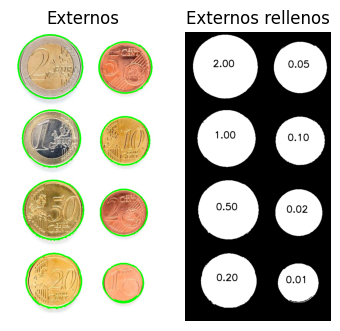

In [12]:
# Variable 
cont = 0

# Funcion de calculo del valor de la moneda, a la que pasas las coordenadas centrales, el radio convertido segun la proporcion y una imagen
def coin_calc(x_coor, y_coor, approx_coin_size, img_cont):
    error= 0.01
    ind_coin_value=0
    #Comprobación moneda dentro del rango
    if approx_coin_size >= coin_diameter[0] and approx_coin_size < coin_diameter[-1]:
        #Bucle comparativo para asignar valor
            for index, value in enumerate(coin_diameter):
                if approx_coin_size<value:
                    #Aproximación del valor de la moneda entre los posibles valores anterior y actual de la tupla de valores de referencia coin_value
                    mid_value=coin_mid_values[index-1]          
                    if approx_coin_size <= mid_value:
                        cv2.putText(img_cont, f"{coin_value[index-1]:.2f}", (int(x_coor-40), int(y_coor)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
                        ind_coin_value=coin_value[index-1]
                        break
                    elif approx_coin_size > mid_value:
                        cv2.putText(img_cont, f"{coin_value[index]:.2f}", (int(x_coor-40), int(y_coor)), cv2.FONT_HERSHEY_SIMPLEX,1 , (0, 0, 0), 2)
                        ind_coin_value=coin_value[index]
                        break 
    #Comprobacion casos extremos de varianza en el tamaño
    if approx_coin_size >= coin_diameter[0]-coin_diameter[0]*error and approx_coin_size < coin_diameter[0]:
        cv2.putText(img_cont, f"{coin_value[0]:.2f}", (int(x_coor-40), int(y_coor)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        ind_coin_value+=coin_value[0]
    elif approx_coin_size <= coin_diameter[-1]+coin_diameter[-1]*error and approx_coin_size > coin_diameter[-1]:
        cv2.putText(img_cont, f"{coin_value[-1]:.2f}", (int(x_coor-40), int(y_coor)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        ind_coin_value+=coin_value[-1]

    #Retorno del valor de la moneda
    return ind_coin_value

def clic_en_imagen(event, x, y, flags, param):
    global moneda_seleccionada
    if event == cv2.EVENT_LBUTTONDOWN: 
        for c in contornos2:
            area = cv2.contourArea(c)
            if area > 10:
                (x_coor, y_coor), det_radio= cv2.minEnclosingCircle(c)
                if np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2) < det_radio:
                    det =(x_coor, y_coor, det_radio)
                    moneda_seleccionada = det

        # Salimos cuando se selecciona la moneda
        if moneda_seleccionada is not None:
            cv2.destroyAllWindows()

#Valores de Referencia para el calculo de monedas
coin_diameter = (16.26, 18.75, 19.75, 21.25, 22.25, 23.25, 24.25, 25.75)
coin_mid_values = (17.505, 19.25, 20.5, 21.75, 22.75, 23.75, 25)
coin_value = (0.01, 0.02, 0.1, 0.05, 0.2, 1, 0.5,2)
moneda_seleccionada = None  
    
#Carga imagen ejemplo con monedas
img = cv2.imread('monedas1.jpg') 
print(img.shape)
#Recordar que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Umbralizado para definir bien los contornos
umbral = 200 
# Umbralizado binario invertido, dado que por defecto se asume objetos en blanco
th1,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)

#Obtiene los contornos externos de la imagen umbralizada
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

#Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)


# Crea una ventana para la imagen
cv2.namedWindow('Imagen', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen', 450, 800)

moneda_seleccionada = cv2.setMouseCallback('Imagen', clic_en_imagen)

# Muestra la imagen con círculos
cv2.imshow('Imagen', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

#Calculo de la referencia seleccionada para la obtencion del valor del resto de monedas(contamos con que la moneda de referencia sea de 1)
monedas_ref = moneda_seleccionada[2]/coin_diameter[5]
total_coin_value=0
#Imagen negra
img_cont = np.zeros(img_rgb.shape)


#Recorre los contornos externos
for c in contornos2:
    #Área del contorno
    area = cv2.contourArea(c)
    #Área mínima (útil filtrar en ocasiones)
    if area > 10:
        #Mínimo círculo que contiene al contorno
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

        approx_coin_size=radio/monedas_ref
        total_coin_value+=coin_calc(cx, cy ,approx_coin_size,img_cont)
        cont+=1
        

print(f"Valor total de las monedas: €{total_coin_value:.2f}")
plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Externos')

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


TAREA: Las tres imágenes cargadas en la celda inicial, han sido extraidas de las imágenes de mayor tamaño presentes en la carpeta. La tarea consiste en extraer características (geométricas y/o visuales) e identificar patrones que permitan distinguir las partículas de cada una de las tres clases, evaluando los aciertos y fallos con las imágenes completas considerando las métricas mostradas y la matriz de confusión. La matriz de confusión, muestra para cada clase el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifican incorrectamente por cada una de las otras dos clases.

En el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación entre el cuadrado del perímetro y el área de la partícula)
- Relación del área de la partícula con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

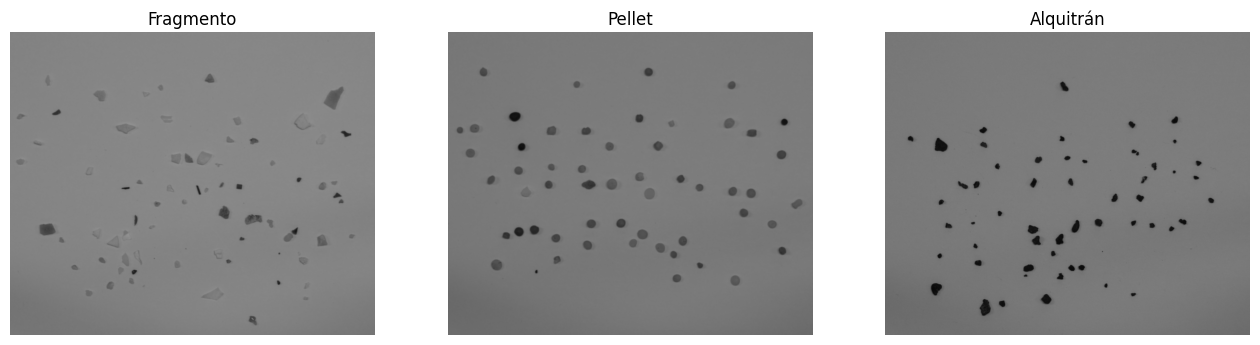

In [3]:
# Carga las tres imágenes: fragmentos, pellets y alquitrán
frag = cv2.imread('fragment-03-olympus-10-01-2020.JPG')
pellet = cv2.imread('pellet-03-olympus-10-01-2020.JPG')
alqui = cv2.imread('tar-03-olympus-10-01-2020.JPG')

# Recorta las imágenes para evitar problemas con las sombras de las imágenes
frag_gris = frag[0:2700, 750:4000]
pellet_gris = pellet[0:2700, 750:4000]
alqui_gris = alqui[0:2700, 750:4000]

# Convierte las imágenes recortadas a escala de grises
frag_gris = cv2.cvtColor(frag_gris, cv2.COLOR_BGR2GRAY)
pellet_gris = cv2.cvtColor(pellet_gris, cv2.COLOR_BGR2GRAY)
alqui_gris = cv2.cvtColor(alqui_gris, cv2.COLOR_BGR2GRAY)

# Aplica un filtro de suavizado a todas las imágenes
frag_gris = cv2.GaussianBlur(frag_gris, (15, 15), 0)
pellet_gris = cv2.GaussianBlur(pellet_gris, (15, 15), 0)

# Muestra las imágenes recortadas
plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title('Fragmento')
plt.axis("off")
plt.imshow(cv2.cvtColor(frag_gris, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.title('Pellet')
plt.axis("off")
plt.imshow(cv2.cvtColor(pellet_gris, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.title('Alquitrán')
plt.axis("off")
plt.imshow(cv2.cvtColor(alqui_gris, cv2.COLOR_BGR2RGB))

plt.show()

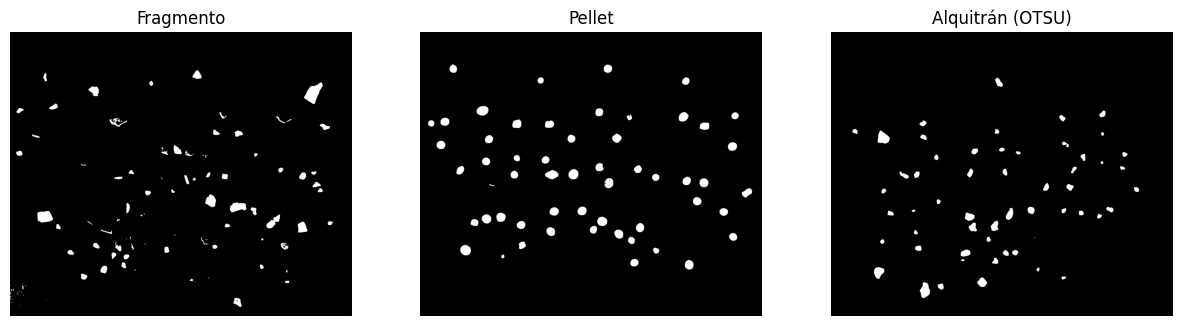

In [4]:
# Umbralizado para 'fragmentos' y 'pellet' 
res,frag_umbral = cv2.threshold(frag_gris,115,255,cv2.THRESH_BINARY_INV)
res,pel_umbral = cv2.threshold(pellet_gris,100,255,cv2.THRESH_BINARY_INV)

# Umbralizado con método de Otsu para 'alquitran'
res,tar_umbral = cv2.threshold(alqui_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Muestra las imágenes umbralizadas
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.title('Fragmento')
plt.axis("off")
plt.imshow(frag_umbral,cmap='gray') 

plt.subplot(132)
plt.title('Pellet')
plt.axis("off")
plt.imshow(pel_umbral,cmap='gray') 

plt.subplot(133)
plt.title('Alquitrán (OTSU)')
plt.axis("off")
plt.imshow(tar_umbral,cmap='gray') 

plt.show()

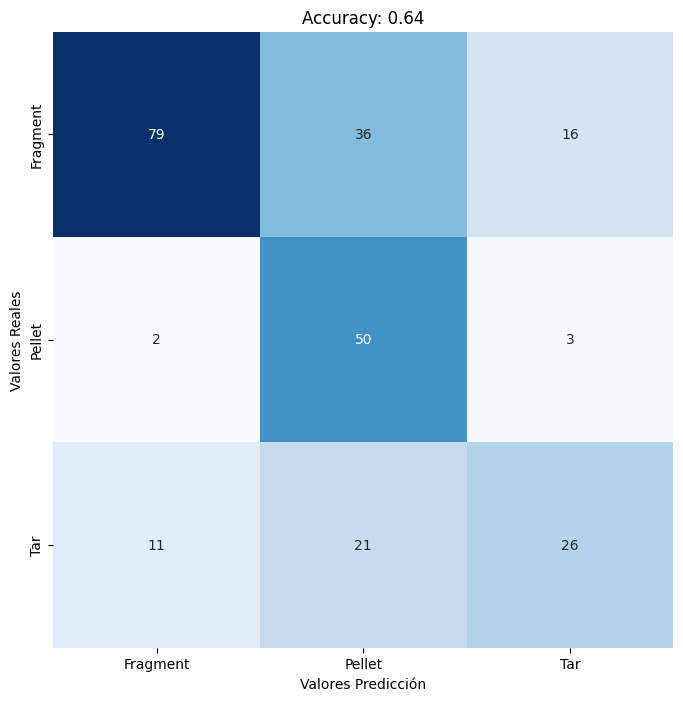

Accuracy: 0.64
Precision: 0.70
Recall: 0.64
F1 Score: 0.64


In [5]:
# Función para clasificar los contornos en una imagen
def clasificar_contornos(imagen):
    contornos, _ = cv2.findContours(imagen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    predicciones = []
    
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        perimetro = cv2.arcLength(contorno, True)
        x, y, w, h = cv2.boundingRect(contorno)
        _, radio = cv2.minEnclosingCircle(contorno)
        compacidad = (perimetro ** 2) / area if area > 0 else 0

        if len(contorno) > 5:
            (centro, (eje_menor, eje_mayor), angulo) = cv2.fitEllipse(contorno)
            relacion_ejes_elipse = eje_menor / eje_mayor
        else:
            relacion_ejes_elipse = 0

        relacion_aspecto = w / h
        relacion_area_contenedor = area / (w * h)

        # Clasificación según reglas heurísticas
        if compacidad < 15.9 and np.isclose(relacion_aspecto, 1.0, rtol=1):
            predicciones.append(1)  # Predicción: Pellet
        elif relacion_area_contenedor < 0.65 and relacion_ejes_elipse < 0.78:
            predicciones.append(0)  # Predicción: Fragmento
        else:
            predicciones.append(2)  # Predicción: Alquitrán
    
    return predicciones

# Arrays para etiquetas reales y predichas
y_true = []
y_pred = []

# Procesa la imagen de fragmentos
y_true.extend([0] * len(clasificar_contornos(frag_umbral)))  # Real: Fragmento
y_pred.extend(clasificar_contornos(frag_umbral))  # Predicción: Clasificador

# Procesa la imagen de pellets
y_true.extend([1] * len(clasificar_contornos(pel_umbral)))  # Real: Pellet
y_pred.extend(clasificar_contornos(pel_umbral))  # Predicción: Clasificador

# Procesa la imagen de alquitrán
y_true.extend([2] * len(clasificar_contornos(tar_umbral)))  # Real: Alquitrán
y_pred.extend(clasificar_contornos(tar_umbral))  # Predicción: Clasificador

# Cálculo de la matriz de confusión y otras métricas
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Muestra la matriz de confusión
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues', 
            xticklabels=['Fragment', 'Pellet', 'Tar'], 
            yticklabels=['Fragment', 'Pellet', 'Tar'])
plt.xlabel("Valores Predicción")
plt.ylabel("Valores Reales")
plt.title(f"Accuracy: {accuracy:.2f}")
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")